# Crypto

## Libraries and settings

In [26]:
# Libraries
import os
import random
import numpy as np
import pandas as pd

from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

from IPython.display import display, clear_output

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/ivesbrunner/Documents/Studium/01_Bachelor/04_Semester/04_ScientificProgramming/scientific_programming/Week_10/challenge


## Barchart displaying prices of crypto

[{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1696501400', 'current_price': 61678, 'market_cap': 1216417912450, 'market_cap_rank': 1, 'fully_diluted_valuation': 1297116535273, 'total_volume': 33168851118, 'high_24h': 61920, 'low_24h': 58680, 'price_change_24h': 2625.11, 'price_change_percentage_24h': 4.44538, 'market_cap_change_24h': 51004692963, 'market_cap_change_percentage_24h': 4.37653, 'circulating_supply': 19693509.0, 'total_supply': 21000000.0, 'max_supply': 21000000.0, 'ath': 73738, 'ath_change_percentage': -16.23292, 'ath_date': '2024-03-14T07:10:36.635Z', 'atl': 67.81, 'atl_change_percentage': 90991.31934, 'atl_date': '2013-07-06T00:00:00.000Z', 'roi': None, 'last_updated': '2024-05-03T14:58:56.155Z'}, {'id': 'ethereum', 'symbol': 'eth', 'name': 'Ethereum', 'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1696501628', 'current_price': 3057.47, 'market_cap': 367008389747,

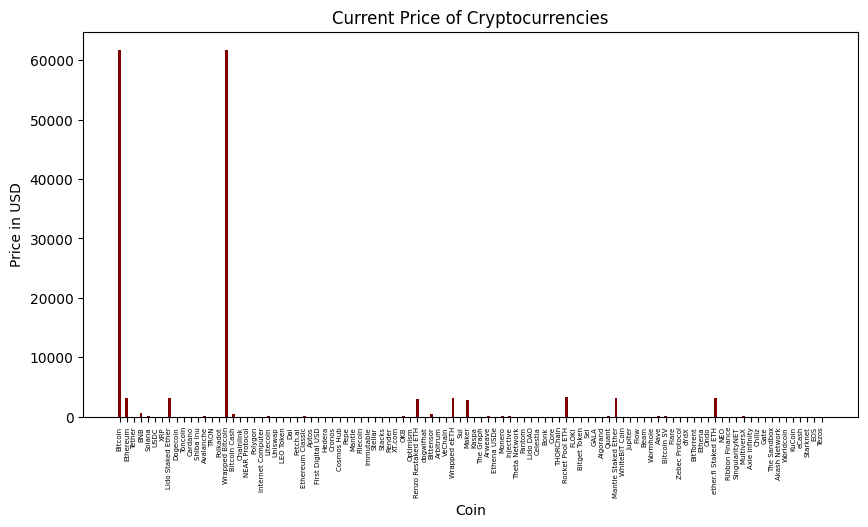

In [50]:
parameters = {
         'vs_currency': 'usd',
         'order': 'market_cap_desc',
         'per_page': 100,
         'page': 1,
         'sparkline': False,
         'locale': 'en'
         }
coin_market_data = cg.get_coins_markets(**parameters)
print(coin_market_data)

df = pd.DataFrame(coin_market_data)
df = df.drop(['id', 'symbol', 'image', 'high_24h', 'low_24h', 'price_change_24h', 'price_change_percentage_24h',
'market_cap_change_24h','market_cap_change_percentage_24h', 'fully_diluted_valuation', 'ath_date', 'ath_change_percentage',
'atl_change_percentage', 'atl_date', 'roi'],  axis = 1)
df

df['current_price'] = df['current_price'].astype(float)
df['name'] = df['name'].astype(str)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df['name'],df['current_price'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Coin")
plt.ylabel("Price in USD")
plt.title("Current Price of Cryptocurrencies")
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=5)
plt.show()

## Histogram of bitcoin

[[1712160000000, 66112.0, 66945.0, 65642.0, 65925.0], [1712174400000, 65867.0, 66586.0, 65518.0, 65895.0], [1712188800000, 65829.0, 66286.0, 65602.0, 66124.0], [1712203200000, 65978.0, 66363.0, 65549.0, 65660.0], [1712217600000, 65698.0, 66211.0, 65135.0, 66056.0], [1712232000000, 66176.0, 66502.0, 66172.0, 66407.0], [1712246400000, 66337.0, 67967.0, 66337.0, 67805.0], [1712260800000, 67648.0, 69199.0, 67565.0, 68678.0], [1712275200000, 68472.0, 68542.0, 67383.0, 68542.0], [1712289600000, 68456.0, 68679.0, 67537.0, 67833.0], [1712304000000, 67889.0, 68039.0, 66508.0, 66957.0], [1712318400000, 66911.0, 67667.0, 66395.0, 66485.0], [1712332800000, 66483.0, 68535.0, 66174.0, 67989.0], [1712347200000, 68230.0, 68331.0, 67401.0, 67572.0], [1712361600000, 67514.0, 67989.0, 67397.0, 67979.0], [1712376000000, 67862.0, 68077.0, 67509.0, 67758.0], [1712390400000, 67837.0, 68234.0, 67637.0, 68156.0], [1712404800000, 68017.0, 68127.0, 67649.0, 67745.0], [1712419200000, 67694.0, 68228.0, 67612.0, 68

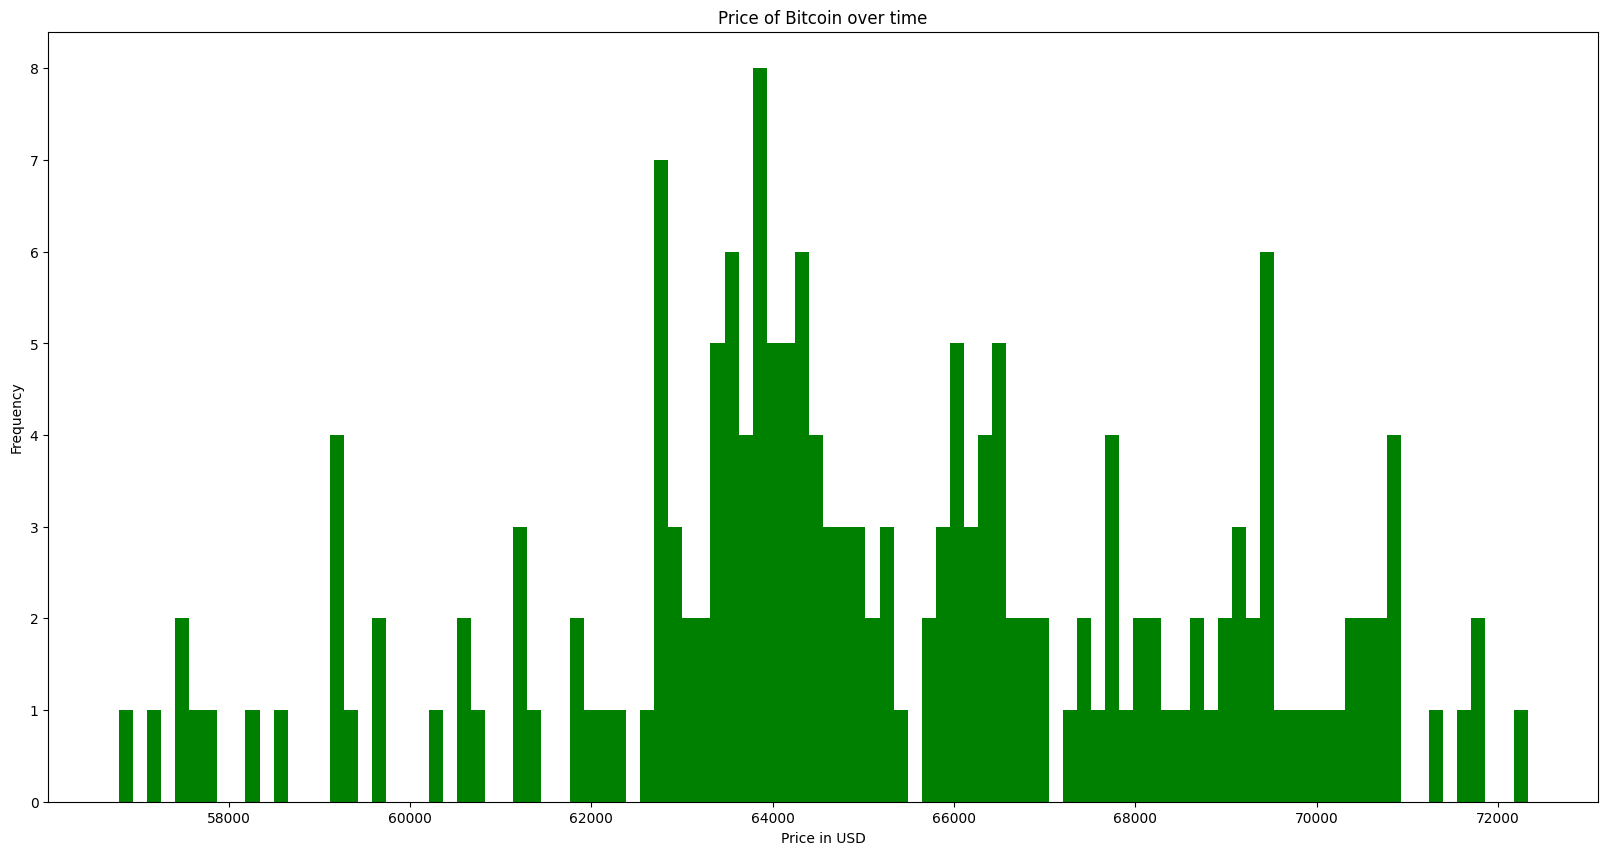

In [41]:
from pycoingecko import CoinGeckoAPI

cg = CoinGeckoAPI()
bitcoin = cg.get_coin_ohlc_by_id("bitcoin", "usd", "30")
print (bitcoin)

df = pd.DataFrame(bitcoin, columns = ['time', 'open', 'high', 'low', 'close'])

fig = plt.figure(figsize = (20, 10))   
plt.hist(df['close'], bins = 100, color ='green',)
plt.xlabel("Price in USD")
plt.ylabel("Frequency")
plt.title("Price of Bitcoin over time")
plt.show()

## Boxplot of bitcoin

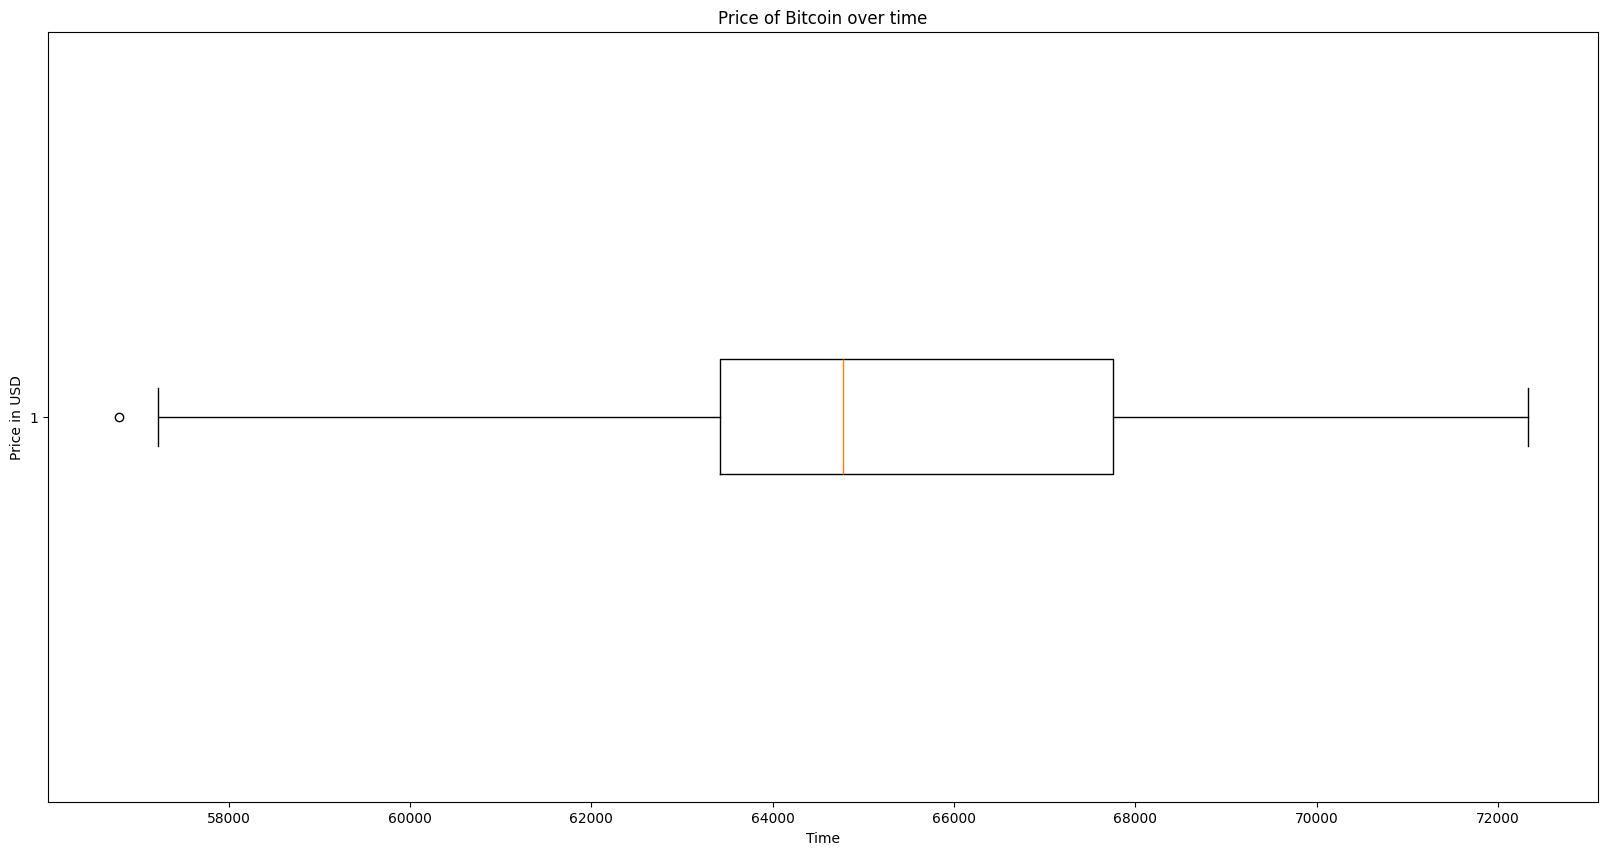

In [47]:
fig = plt.figure(figsize = (20, 10))
plt.boxplot(df['close'], vert=False)

plt.xlabel("Time")
plt.ylabel("Price in USD")
plt.title("Price of Bitcoin over time")
plt.show()

## Scatterplot of Bitcoin and Ehterum

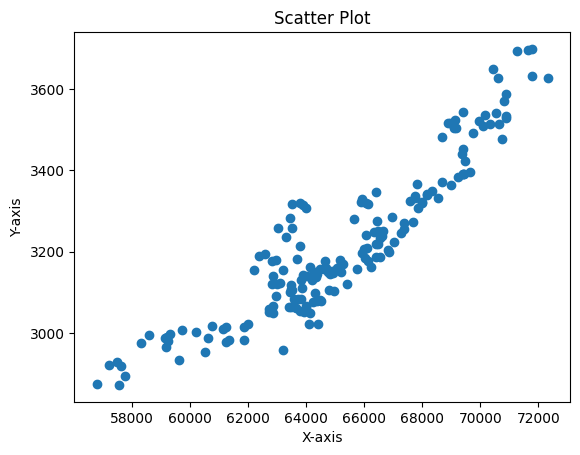

In [52]:
import matplotlib.pyplot as plt

bitcoin = cg.get_coin_ohlc_by_id("bitcoin", "usd", "30")
etherum = cg.get_coin_ohlc_by_id("ethereum", "usd", "30")
data_bitcoin = pd.DataFrame(bitcoin, columns = ['time', 'open', 'high', 'low', 'close'])
data_etherum = pd.DataFrame(etherum, columns = ['time', 'open', 'high', 'low', 'close'])

x = data_bitcoin['close']
y = data_etherum['close']

# Create scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Display the plot
plt.show()


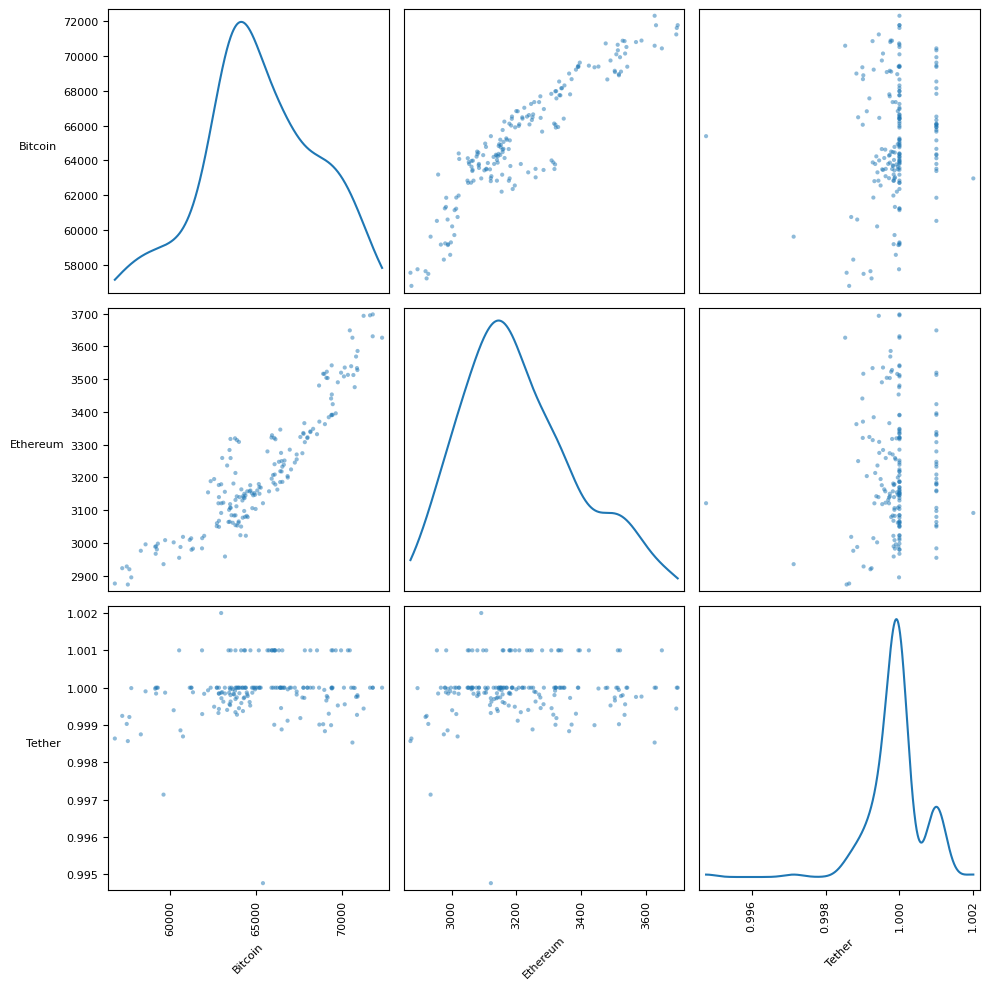

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

tether = cg.get_coin_ohlc_by_id("tether", "usd", "30")
data_tether = pd.DataFrame(tether, columns = ['time', 'open', 'high', 'low', 'close'])

# Create a DataFrame with the cryptocurrency prices
data = pd.DataFrame({
    'Bitcoin': data_bitcoin['close'],
    'Ethereum': data_etherum['close'],
    'Tether': data_tether['close']
})

# Create a scatterplot matrix
scatter_matrix = pd.plotting.scatter_matrix(data, figsize=(10, 10), diagonal='kde')

# Customize the scatterplot matrix
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_fontsize(8)
    ax.yaxis.label.set_fontsize(8)
    ax.title.set_fontsize(10)

plt.tight_layout()
plt.show()


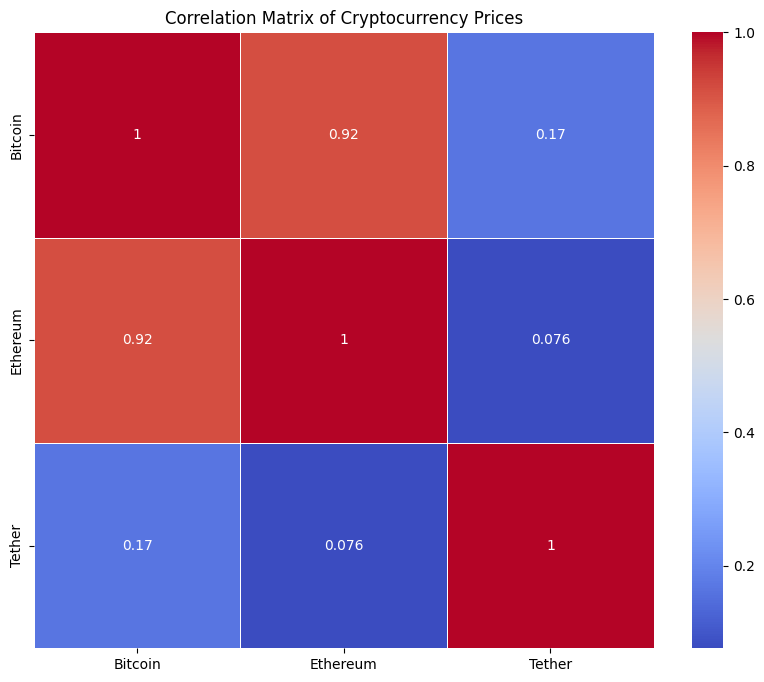

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Cryptocurrency Prices')
plt.show()


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')